# Credit card Fraud detection

## Introduction
In this kernel we will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. Let's start!

In [1]:
### import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# checking if there is any bull value in datasset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# checking the percentage of fraud and non-fraud transaction over the dataset
print("No Fraud",round(df['Class'].value_counts()[0]/len(df)*100,2),"% of dataset")
print("Fruads",round(df['Class'].value_counts()[1]/len(df)*100,2),"% of dataset")

No Fraud 99.83 % of dataset
Fruads 0.17 % of dataset


Text(0.5, 1.0, 'Class Distribution \n (0: No Fruad || 1: Fruad)')

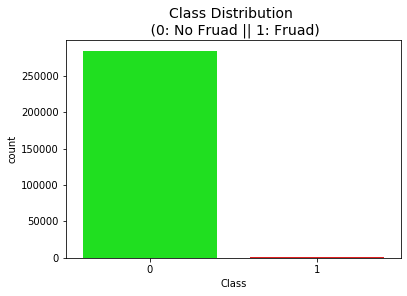

In [9]:
# Looks from the observation that the data is very skewed, using seaborn for the visualisation.
import seaborn as sns
# Seaborn is a library which runs underneath matplotllb and used to plot graphs.
color = ['#00FF00','#FF0000']
sns.countplot('Class',data=df,palette=color) 
plt.title("Class Distribution \n (0: No Fruad || 1: Fruad)",fontsize=14)

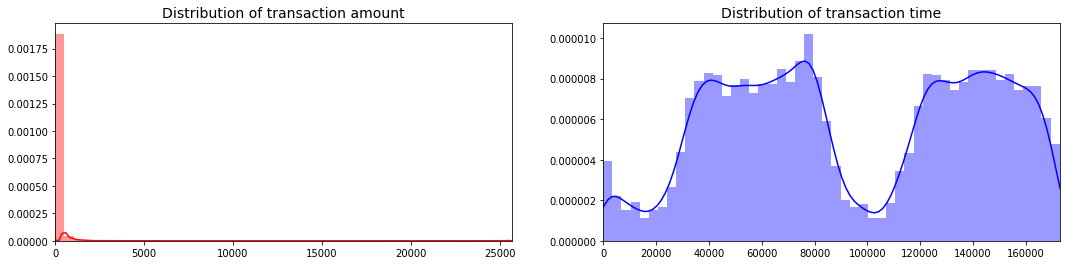

In [10]:

fig,ax = plt.subplots(1,2,figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values


sns.distplot(amount_val,ax=ax[0],color='r')
ax[0].set_title('Distribution of transaction amount', fontsize=14)
ax[0].set_xlim([min(amount_val),max(amount_val)])

sns.distplot(time_val, ax = ax[1], color='b')
ax[1].set_title('Distribution of transaction time', fontsize=14)
ax[1].set_xlim([min(time_val),max(time_val)])

plt.show()

### Scaling and Distribution

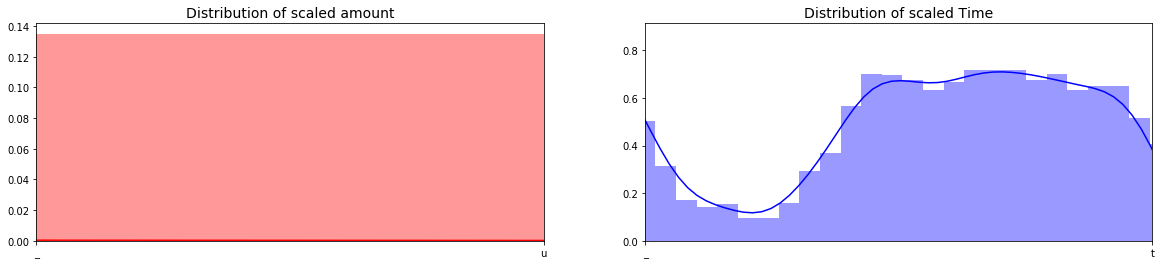

In [11]:

from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()

rob_scaler = RobustScaler()


df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

fig,ax = plt.subplots(1,2,figsize=(20,4))

scaled_amount = df['scaled_amount'].values
scaled_time = df['scaled_time'].values

sns.distplot(scaled_amount,ax = ax[0],color='r')
ax[0].set_title('Distribution of scaled amount',fontsize=14)
ax[0].set_xlim([min('scaled_amount'),max('scaled_amount')])

sns.distplot(scaled_time,ax=ax[1],color='b')
ax[1].set_title('Distribution of scaled Time',fontsize=14)
ax[1].set_xlim([min('scaled_time'),max('scaled_time')])

plt.show()

df.drop(['Time','Amount'],axis=1,inplace=True)

In [12]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_time','scaled_amount'],axis=1,inplace=True)

df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


### Splitting the data

In [16]:

from sklearn.model_selection import train_test_split 

from sklearn.model_selection import StratifiedShuffleSplit,KFold,StratifiedKFold


print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100,2),'% of dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100,2),'% of dataset')

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index, test_index in sss.split(X,y):
    print('Train:', train_index,'Test:', test_index)
    orignal_Xtrain, orignal_Xtest = X.iloc[train_index],X.iloc[test_index]
    orignal_ytrain, orignal_ytest = y.iloc[train_index],y.iloc[test_index]
    
# Turn into an array
orignal_Xtrain = orignal_Xtrain.values
orignal_Xtest = orignal_Xtest.values
orignal_ytrain = orignal_ytrain.values
orignal_ytest = orignal_ytest.values


train_unique_label, train_counts_label = np.unique(orignal_ytrain, return_counts=True)
test_unique_label,test_counts_label = np.unique(orignal_ytest,return_counts=True)
print('-'*100)

print('Label Distribution: \n')
print(train_counts_label/len(orignal_ytrain))
print(test_counts_label/len(orignal_ytest))


No Frauds 99.83 % of dataset
Frauds 0.17 % of dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distribution: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Random Undersampling

- In this pharse of the project we will implement "Random under sampling" which basically consists of removing datain order to have a more balanced dataset and thus avoiding our models to overfitting.

- the main issue with random undersampling is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss bringing 492 non-fraud transaction from 284,315 non-fraud transaction.

In [35]:
# Since our classes are skewed we should make them equivalent in order to have a normal distribution of classes.

# amount of fraud classes 492 rows
fraud_df = df[df['Class']==1]
non_fraud_df = df[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

normal_distributed_df.shape

#normal_distributed_df.head()

(984, 31)

### Equally Distributing and Correlating:

ab jb humara data correctly balanced h, hum further analysis aur data preprocessing kr skte h

Distribution of the classes of the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


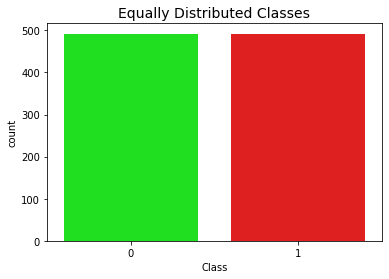

In [14]:
print('Distribution of the classes of the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=color)
plt.title('Equally Distributed Classes',fontsize=14)
plt.show()

### Correlation matrices(28|10|20)

Correlation matrix essence hota h humare data ko understand krne ka. Hume ye pta krna h ki konse features heavely influence krte h ek specific transaction ko fraud declare krne ke lea. Ye important hota h ki hum sahi dataframe(subsample) use kre ye dekne ke lea ki konse features ka high positive ya phir negative correlation h ek fraud transaction ke hisab se

Example:
- Negative Correlations: v17,v14,v12,v10 ye negatively correlated features h, kyuki kisi bhi fraud transaction ke lea inn features ki value low h.
- Positive Correlations: v2,v4,v11,v19 similarly ye positively correlated h

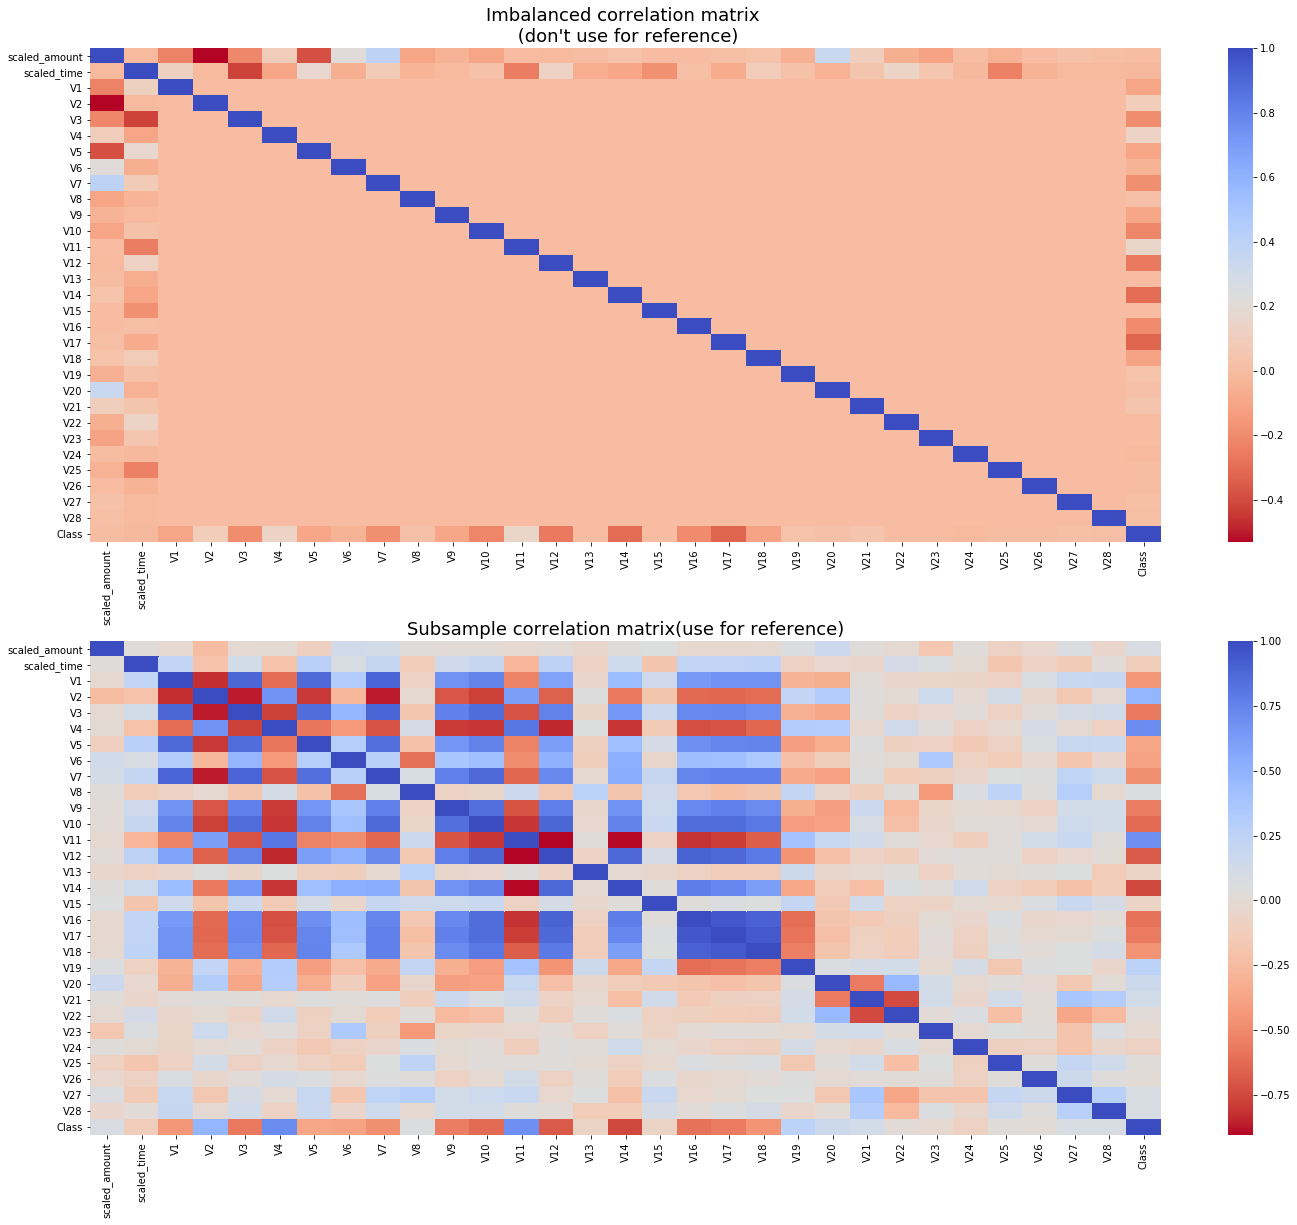

In [15]:


f, (ax1,ax2) = plt.subplots(2,1,figsize=(24,20))


corr = df.corr()

sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax1)

ax1.set_title("Imbalanced correlation matrix \n (don't use for reference)",fontsize=18)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax2)
ax2.set_title('Subsample correlation matrix(use for reference)',fontsize=18)
plt.show()

### 30|10|20

#### Boxplot on a Normal Distribution
<img src='https://miro.medium.com/max/875/1*NRlqiZGQdsIyAu0KzP7LaQ.png' width="500"/>


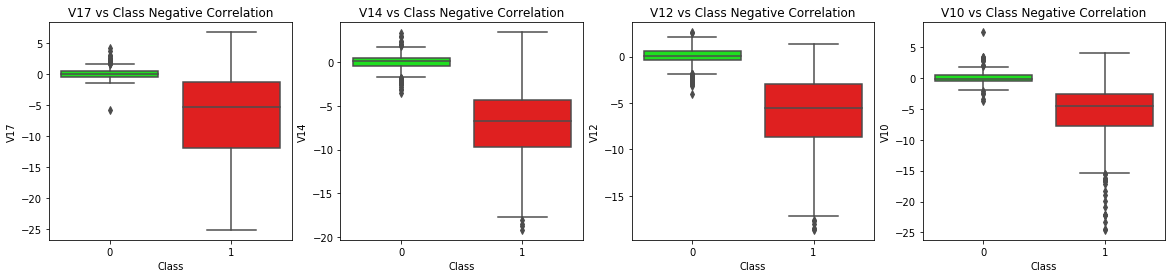

In [16]:
f,axes = plt.subplots(ncols=4,figsize=(20,4))


sns.boxplot(x='Class',y='V17',data=new_df,palette=color,ax=axes[0])

axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,palette=color,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x='Class',y='V12',data=new_df,palette=color,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=color,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

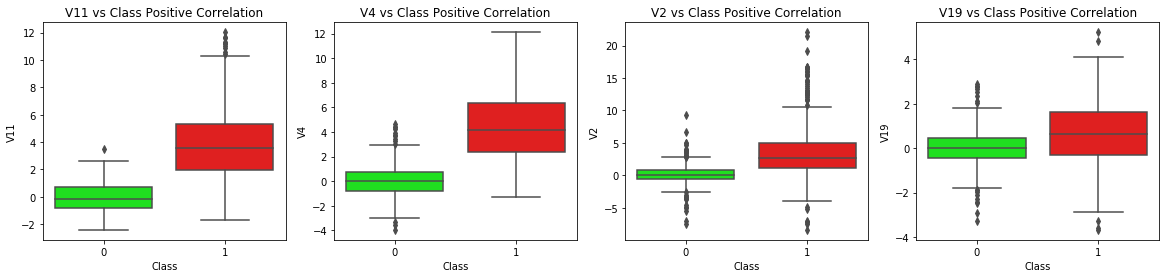

In [17]:
f,axes = plt.subplots(ncols=4,figsize=(20,4))


sns.boxplot(x='Class',y='V11',data=new_df,palette=color,ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df,palette=color,ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V2',data=new_df,palette=color,ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V19',data=new_df,palette=color,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()


### Anomaly Detection


### Interquartile range method


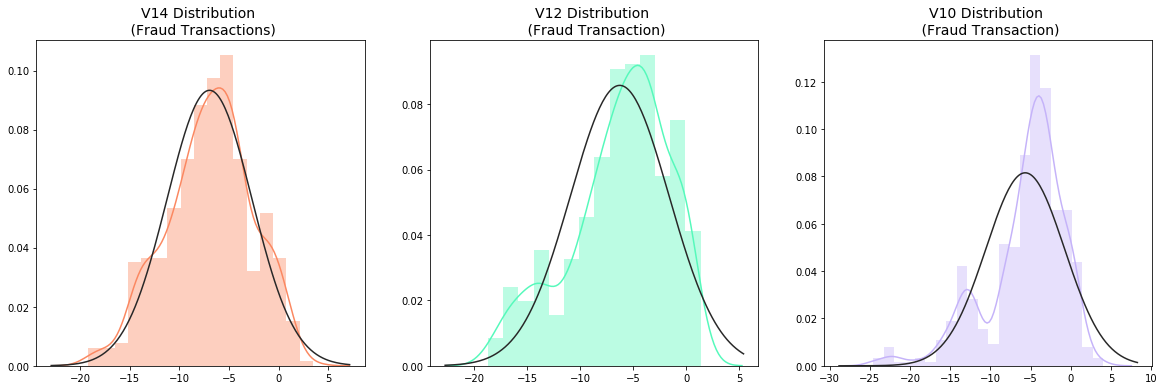

In [18]:
from scipy.stats import norm


f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist,ax=ax1,fit=norm,color='#FB8861') 
ax1.set_title('V14 Distribution \n (Fraud Transactions)',fontsize=14)


v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist,ax=ax2,fit=norm,color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transaction)',fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist,ax=ax3,fit=norm,color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transaction)',fontsize=14)


plt.show()

In [19]:
## v14 removing outliers
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25,q75))
v14_iqr = q75-q25
print('iqr : {}'.format(v14_iqr))


v14_cut_off = v14_iqr*1.5
v14_lower,v14_upper = q25 - v14_cut_off,q75+v14_cut_off
print('Cut off: {}'.format(v14_cut_off))
print('v14 lower: {}'.format(v14_lower))
print('v14 upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x<v14_lower or x>v14_upper]
print('Feature V14 Outliers from fraud cases : {}'.format(len(outliers)))
print('V14 Outliers : {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14']>v14_upper) | (new_df['V14']<v14_lower)].index)
print('----'*44)

## v12 removing outliers
v12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25,q75))
v12_iqr = q75-q25
print('iqr : {}'.format(v12_iqr))

v12_cut_off = v12_iqr*1.5
v12_lower,v12_upper = q25-v12_cut_off,q75+v12_cut_off
print('Cut off: {}'.format(v12_cut_off))
print('v12 lower: {}'.format(v12_lower))
print('v12 upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x>v12_upper or x<v12_lower]
print('Feature V12 Outliers from fraud cases: {}'.format(len(outliers)))
print('V12 Outliers: {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V12']>v12_upper) | (new_df['V12']<v12_lower)].index)
print('----'*44)

## v10 removing outliers
v10_fraud = new_df['V10'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25,q75))
v10_iqr = q75-q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr*1.5
v10_lower,v10_upper = q25-v10_cut_off,q75+v10_cut_off
print('Cut off: {}'.format(v10_cut_off))
print('V10 lower: {}'.format(v10_lower))
print('V10 upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x>v10_upper or x<v10_lower]
print('Feature v10 outlier from fraud cases: {}'.format(len(outliers)))
print('V10 outliers: {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V10']>v10_upper) | (new_df['V10']<v10_lower)].index)

print('Number of instances after removing outliers : {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr : 5.409902115485519
Cut off: 8.114853173228278
v14 lower: -17.807576138200663
v14 upper: 3.8320323237414122
Feature V14 Outliers from fraud cases : 4
V14 Outliers : [-18.049997689859396, -18.8220867423816, -19.2143254902614, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr : 5.780002635714835
Cut off: 8.670003953572252
v12 lower: -17.3430371579634
v12 upper: 5.776973384895937
Feature V12 Outliers from fraud cases: 4
V12 Outliers: [-18.683714633344298, -18.4311310279993, -18.047596570821604, -18.553697009645802]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -7.4666

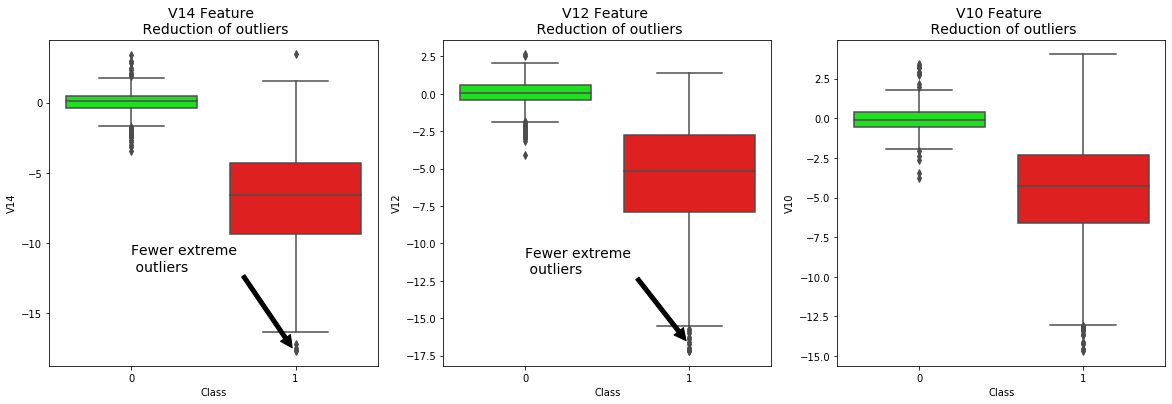

In [20]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

colors = ['#00FF00','#FF0000']
# Boxplot with outliers removed
# Feature V14
sns.boxplot(x='Class',y='V14',data=new_df,ax = ax1,palette=colors)
ax1.set_title('V14 Feature \n Reduction of outliers',fontsize=14)
ax1.annotate('Fewer extreme \n outliers',xy = (0.98,-17.5),xytext=(0,-12),arrowprops=dict(facecolor='black'),fontsize=14)

# Feature V12
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax2,palette=colors)
ax2.set_title('V12 Feature \n Reduction of outliers',fontsize=14)
ax2.annotate('Fewer extreme \n outliers',xy=(0.98,-16.5),xytext=(0,-12),arrowprops=dict(facecolor='black'),fontsize=14)

# Feature V10
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax3,palette=colors)
ax3.set_title('V10 Feature \n Reduction of outliers',fontsize=14)
ax3.annotate('Fewer extreme \n outliers',xy=(0.98,-16.5),xytext=(0,-12),arrowprops=dict(facecolor='black'),fontsize=14)
plt.show()

### Dimentionality Reduction and Clustering

In [21]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# new_df is from random undersample data (fewer instances)
x = new_df.drop('Class',axis=1)
y = new_df['Class']

# TSNE(t-distributed stochastic neighbourhood embedding) implementation
t0 = time.time()
x_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(x.values)
 
t1 = time.time()
print('T-SNE took {:.2} s'.format(t1-t0))


# PCA implementation
t0 = time.time()
x_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(x.values)
t1 = time.time()
print('PCA took : {:.2}'.format(t1-t0))

t0 = time.time()
x_reduced_svd = TruncatedSVD(n_components=2, algorithm = 'randomized',random_state=42).fit_transform(x.values)
t1 = time.time()
print('Truncated SVD took {:.2} s'.format(t1-t0))

T-SNE took 1.5e+01 s
PCA took : 0.033
Truncated SVD took 0.0 s


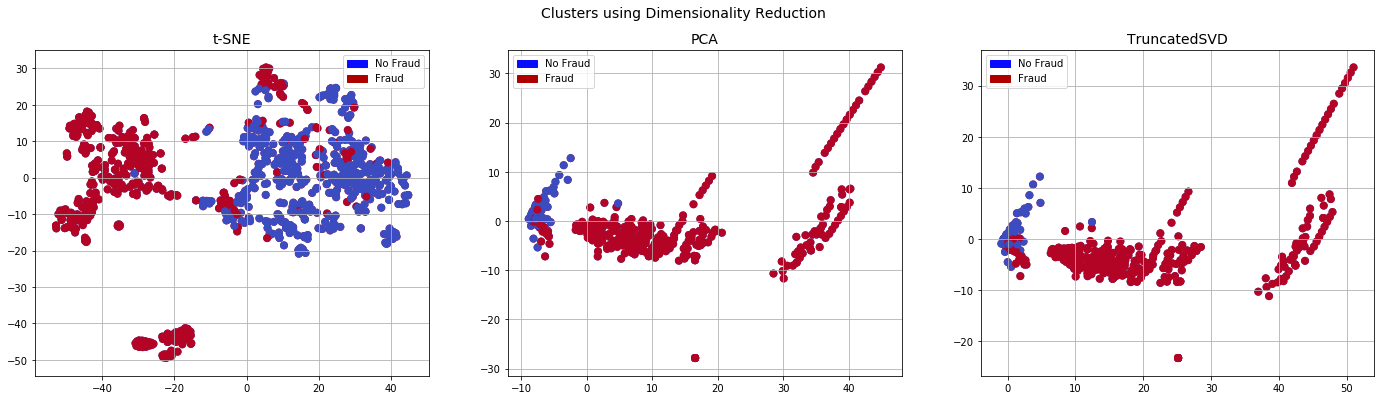

In [22]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24,6))
# lables = ['No Fraud','Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF',label = 'No Fraud')
red_patch = mpatches.Patch(color='#AF0000',label='Fraud')

# t-SNE scatter plot
ax1.scatter(x_reduced_tsne[:,0],x_reduced_tsne[:,1], c=(y==0),cmap='coolwarm',label='No Fraud', linewidths=2)
ax1.scatter(x_reduced_tsne[:,0],x_reduced_tsne[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax1.set_title('t-SNE',fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch,red_patch])

#PCA scatter plot
ax2.scatter(x_reduced_pca[:,0],x_reduced_pca[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax2.scatter(x_reduced_pca[:,0],x_reduced_pca[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax2.set_title('PCA',fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch,red_patch])

# TruncatedSVD scatter plot
ax3.scatter(x_reduced_svd[:,0],x_reduced_svd[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidth=2)
ax3.scatter(x_reduced_svd[:,0],x_reduced_svd[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidth=2)
ax3.set_title('TruncatedSVD',fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch,red_patch])

### Classifiers(UnderSampling)(30|11|20):

In [23]:
# UnderSampling before cross validating(prone to overfit)
x = new_df.drop('Class',axis=1)
y = new_df['Class']

In [24]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNearest" : KNeighborsClassifier(),
    "Support Vector Classifier" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier()
}

In [27]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    training_score = cross_val_score(classifier,x_train,y_train,cv=5)
    print("Classifiers: ", classifier.__class__.__name__,"Has a training score of", round(training_score.mean(),2)
          * 100,"% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [28]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}

grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(x_train,y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors" : list(range(2,5,1)), 'algorithm' : ['auto','ball_tree','kd_tree','brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(x_train,y_train)
#KNears best estimator
knears_neighbours = grid_knears.best_estimator_

#Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# Decision tree classifier
tree_params = {"criterion": ["gini","entropy"],"max_depth":list(range(2,4,1)),
              "min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_tree.fit(x_train,y_train)

#tree best estimator
tree_clf = grid_tree.best_estimator_

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_valida

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [29]:
# Overfitting case
log_reg_score = cross_val_score(log_reg,x_train,y_train,cv = 5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100,2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbours,x_train,y_train,cv=5)
print('knears Neighbors Cross Validation Score', round(knears_score.mean()*100,2).astype(str) + '%')

svc_score = cross_val_score(svc,x_train,y_train,cv=5)
print('SVC Cross Validation Score: ',round(svc_score.mean()*100,2).astype(str) + '%')

tree_score = cross_val_score(tree_clf,x_train,y_train,cv=5)
print('Decision Tree Cross Validation Score: ',round(tree_score.mean()*100,2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.93%
knears Neighbors Cross Validation Score 93.8%
SVC Cross Validation Score:  93.4%
Decision Tree Cross Validation Score:  93.4%


In [39]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# We will undersample during cross validating
undersample_x = df.drop('Class',axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_x, undersample_y):
    print('Train:', train_index, 'Test:', test_index)
    undersample_xtrain, undersample_xtest = undersample_x.iloc[train_index], undersample_x.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_x.iloc[test_index]
    
undersample_xtrain = undersample_xtrain.values
undersample_xtest = undersample_xtest.values
undersample_ytest = undersample_ytest.values
undersample_ytrain = undersample_ytrain.values

undersample_accuracy = []
undersample_precission = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing nearmiss technique
# Distribution of nearmiss (Just to see how it distributes the labels we won't use these variables)

x_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_x.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross validating the right way

for train, test in sss.split(undersample_xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),log_reg) 
    #SMOTE happens during crossvalidation not before
    undersample_model = undersample_pipeline.fit(undersample_xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(orignal_Xtrain[test], orignal_ytrain[test]))
    undersample_precission.append(precision_score(orignal_ytrain[test],undersample_prediction))
    
    undersample_recall.append(recall_score(orignal_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(orignal_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(orignal_ytrain[test], undersample_prediction))
    

Train: [ 50979  51006  51028 ... 284804 284805 284806] Test: [    0     1     2 ... 56974 56975 56976]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 50979  51006  51028 ... 113939 113940 113941]
Train: [     0      1      2 ... 284804 284805 284806] Test: [106550 106719 107525 ... 170891 170892 170893]
Train: [     0      1      2 ... 284804 284805 284806] Test: [165773 167040 167551 ... 227855 227856 227857]
Train: [     0      1      2 ... 227855 227856 227857] Test: [223073 223599 223844 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})
